In [1]:
import pandas as pd, matplotlib.pyplot as plt, seaborn as sns

plt.style.use('dark_background')

In [2]:
callCenter = pd.read_excel(r"C:\Users\roylo\OneDrive\Documentos\Data Science\Proyectos\Call Center\src\Datasets\callCenter.xlsx", engine='openpyxl')

callCenter.head()

,CallId,Date,Agent,Department,Answered,Resolved,SpeedOfAnswer,AvgTalkDuration(Seconds),SatisfactionRating,Hour
0,ID0001,2015-01-01,Diane,Washing Machine,Y,Y,109,143,3,9
1,ID0002,2015-01-01,Becky,Air Conditioner,Y,N,70,242,3,9
2,ID0003,2015-01-01,Stewart,Washing Machine,Y,Y,10,131,3,9
3,ID0004,2015-01-01,Greg,Washing Machine,Y,Y,53,37,2,9
4,ID0005,2015-01-01,Becky,Toaster,Y,Y,95,60,3,10


In [24]:
import plotly.express as px

px.scatter_3d(
    data_frame=callCenter,
    x='SpeedOfAnswer',
    y='AvgTalkDuration(Seconds)',
    z='SatisfactionRating',
    color='Resolved'
)

In [9]:
callCenter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   CallId                    5000 non-null   object        
 1   Date                      5000 non-null   datetime64[ns]
 2   Agent                     5000 non-null   object        
 3   Department                5000 non-null   object        
 4   Answered                  5000 non-null   object        
 5   Resolved                  5000 non-null   object        
 6   SpeedOfAnswer             5000 non-null   int64         
 7   AvgTalkDuration(Seconds)  5000 non-null   int64         
 8   SatisfactionRating        5000 non-null   int64         
 9   Hour                      5000 non-null   int64         
dtypes: datetime64[ns](1), int64(4), object(5)
memory usage: 390.8+ KB


# **`Univariable Analysis`**

In [4]:
print(f"Average Rating: {callCenter['SatisfactionRating'].mean():,.2f}")

Average Rating: 2.76


In [5]:
print(f"Total Calls : {callCenter.shape[0]:,}")

Total Calls : 5,000


In [6]:
print(f"Total Agents : {callCenter['Agent'].nunique()}")

Total Agents : 8


In [7]:
print(f"Total Departments : {callCenter['Department'].nunique():,}")

Total Departments : 5


In [8]:
print(f"Standard Deviation of the Speed of Answer : {callCenter['SpeedOfAnswer'].std():,.2f}")

Standard Deviation of the Speed of Answer : 40.18


In [9]:
print(f"Standard Deviation of the AvgTalkDuration : {callCenter['AvgTalkDuration(Seconds)'].std():,.2f}")

Standard Deviation of the AvgTalkDuration : 133.36


### **`Date`**

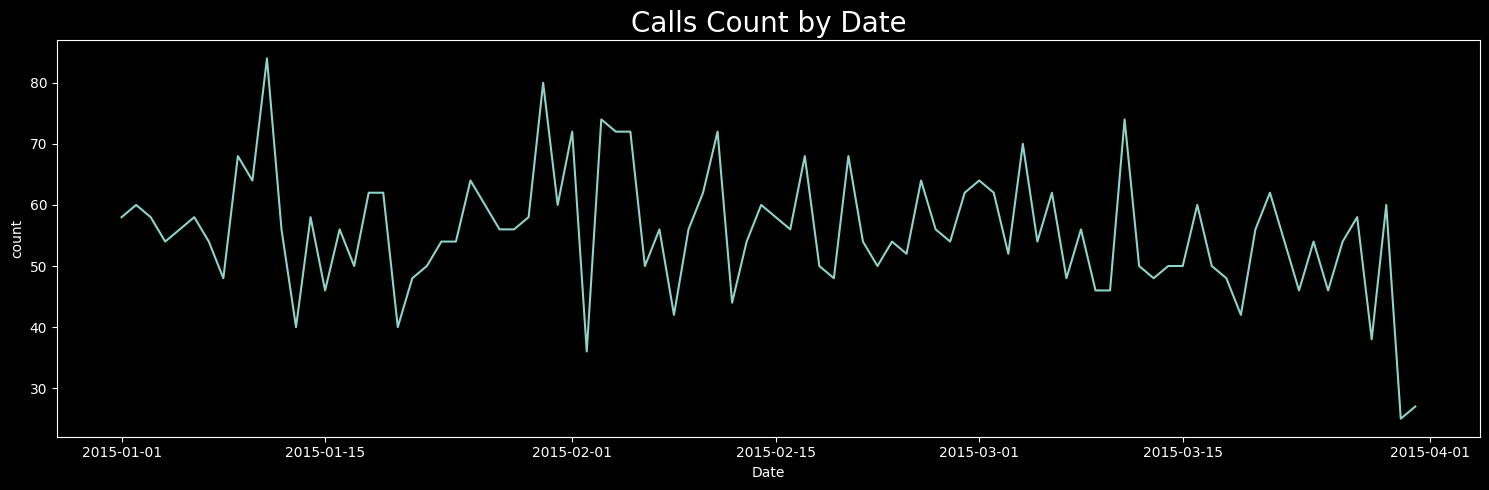

In [10]:
plt.figure(figsize=(15,5))

sns.lineplot(
    data=callCenter['Date'].value_counts(),
)

plt.title("Calls Count by Date", fontsize=20)
plt.tight_layout()
plt.show()

### **`Agent`**

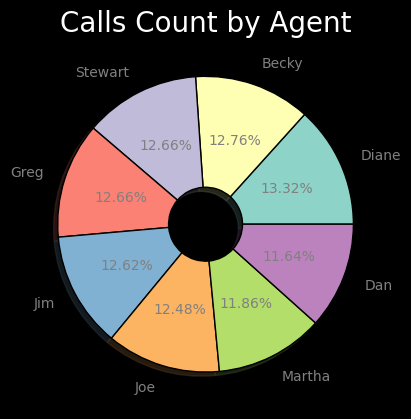

In [11]:
plt.pie(
    x=callCenter['Agent'].value_counts(),
    labels=callCenter['Agent'].unique(),
    labeldistance=1.15,
    autopct="%.2f%%",
    pctdistance=0.6,
    shadow=True,
    wedgeprops=dict(width=0.75, edgecolor='black'),
    textprops=dict(color='grey')
)

plt.title("Calls Count by Agent", fontsize=20)
plt.show()

### **`Department`**

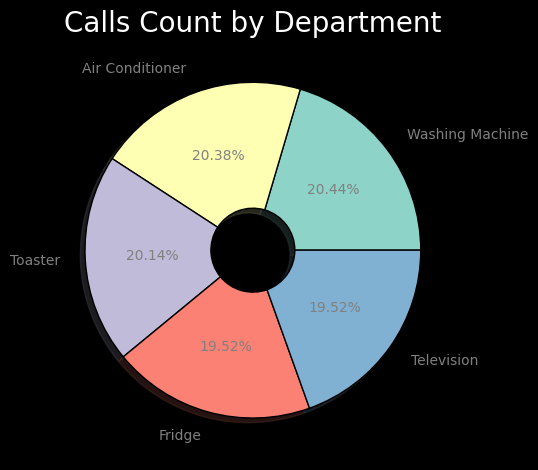

In [12]:
plt.pie(
    x=callCenter['Department'].value_counts(),
    labels=callCenter['Department'].unique(),
    labeldistance=1.15,
    autopct="%.2f%%",
    pctdistance=0.6,
    shadow=True,
    wedgeprops=dict(width=0.75, edgecolor='black'),
    textprops=dict(color='grey')
)

plt.title("Calls Count by Department", fontsize=20)
plt.tight_layout()
plt.show()

### **`Answered (Y/N)`**

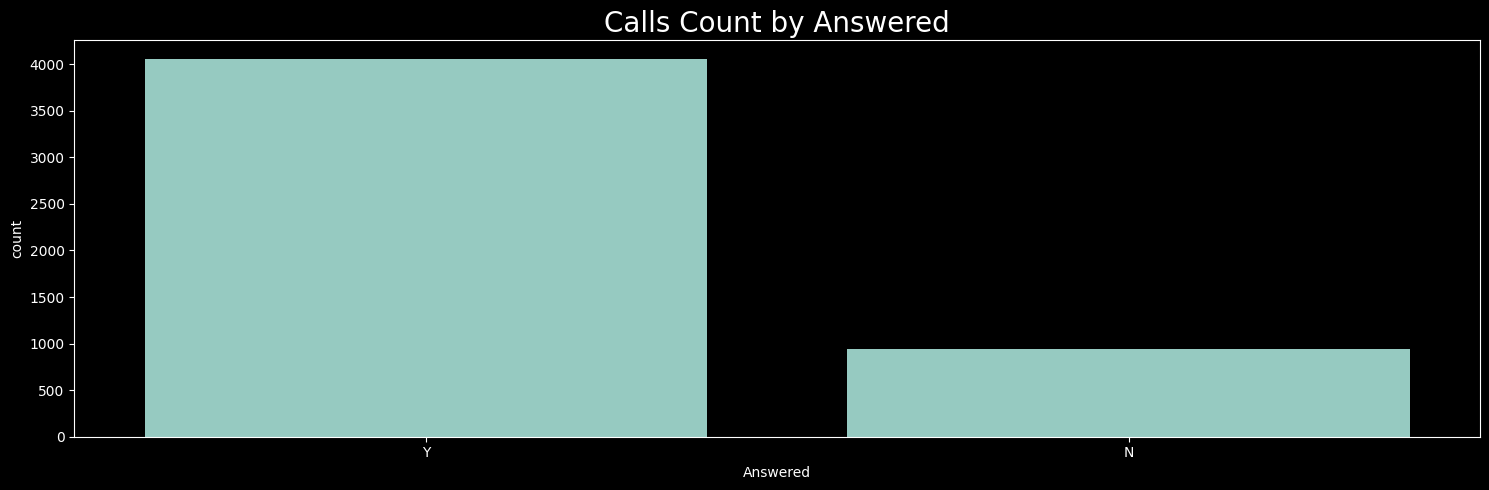

In [13]:
plt.figure(figsize=(15,5))

sns.countplot(
    x=callCenter['Answered']
)

plt.title("Calls Count by Answered", fontsize=20)
plt.tight_layout()
plt.show()

### **`Resolved`**

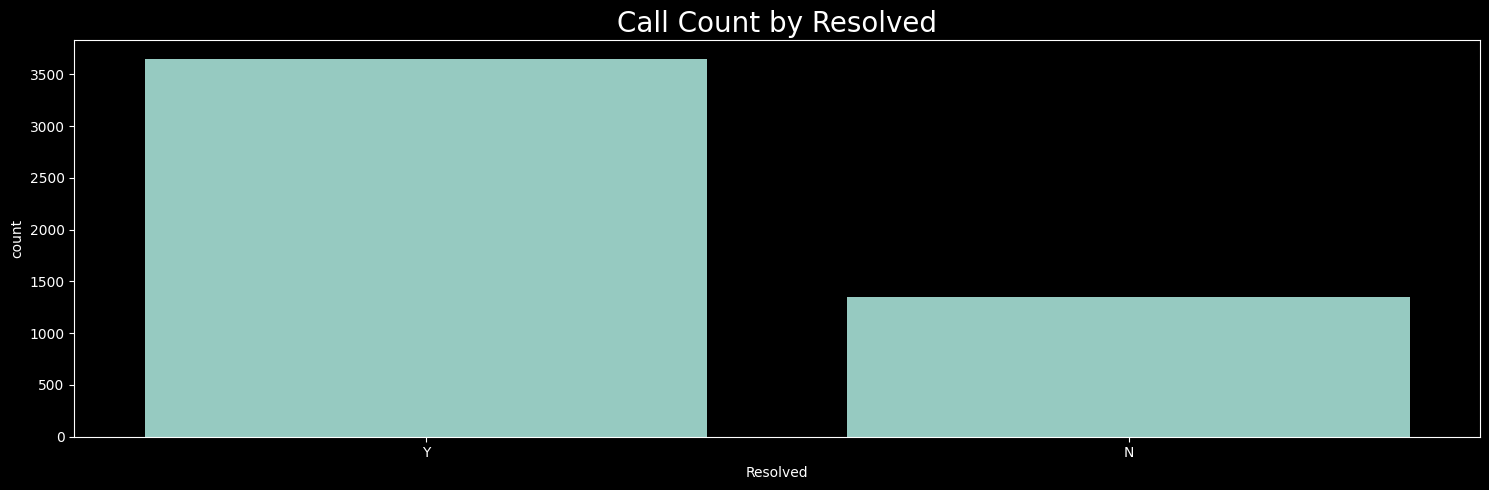

In [14]:
plt.figure(figsize=(15,5))

sns.countplot(
    x=callCenter['Resolved']
)

plt.title("Call Count by Resolved", fontsize=20)
plt.tight_layout()
plt.show()

### **`Speed of Answer`**

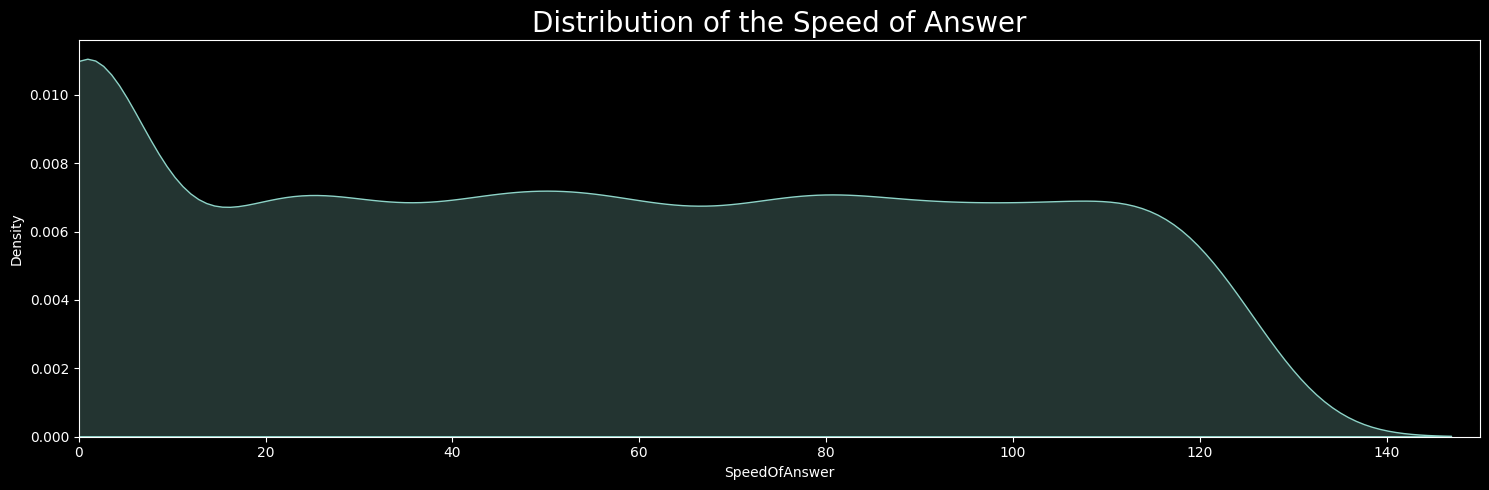

In [15]:
callsCountSpeedAnswer = callCenter['SpeedOfAnswer']

plt.figure(figsize=(15,5))

sns.kdeplot(
    data=callsCountSpeedAnswer,
    fill=True
)

plt.title("Distribution of the Speed of Answer", fontsize=20)
plt.xlim(0, 150)
plt.tight_layout()
plt.show()

### **`AvgTalkDuration (seconds)`**

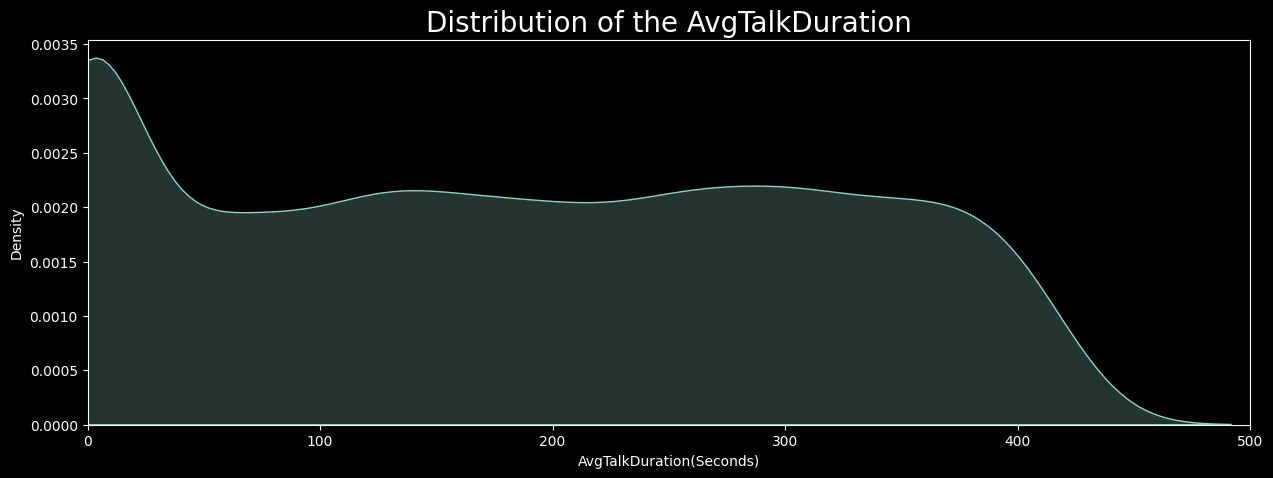

In [16]:
plt.figure(figsize=(15,5))

sns.kdeplot(
    data=callCenter['AvgTalkDuration(Seconds)'],
    fill=True
)

plt.title("Distribution of the AvgTalkDuration", fontsize=20)
plt.xlim(0,500)
plt.show()

### **`Satisfaction Rating`**

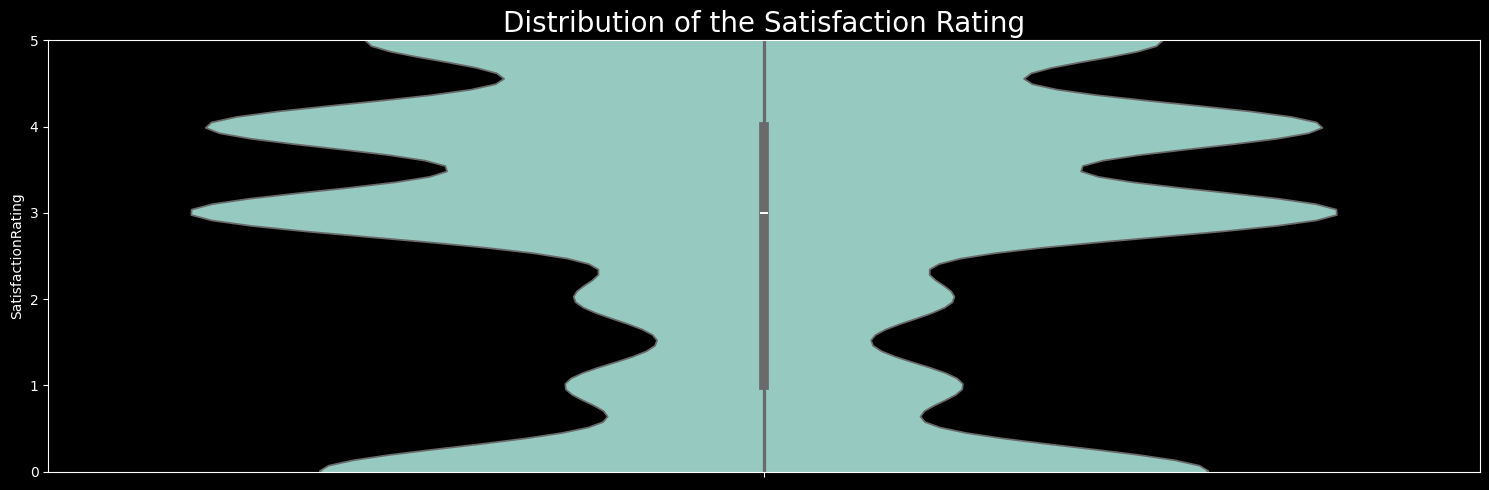

In [17]:
plt.figure(figsize=(15,5))

sns.violinplot(
    data=callCenter['SatisfactionRating'],
    inner_kws=dict(box_width=7)
)

plt.title("Distribution of the Satisfaction Rating", fontsize=20)
plt.ylim(0, 5)
plt.tight_layout()
plt.show()

### **`Hour`**

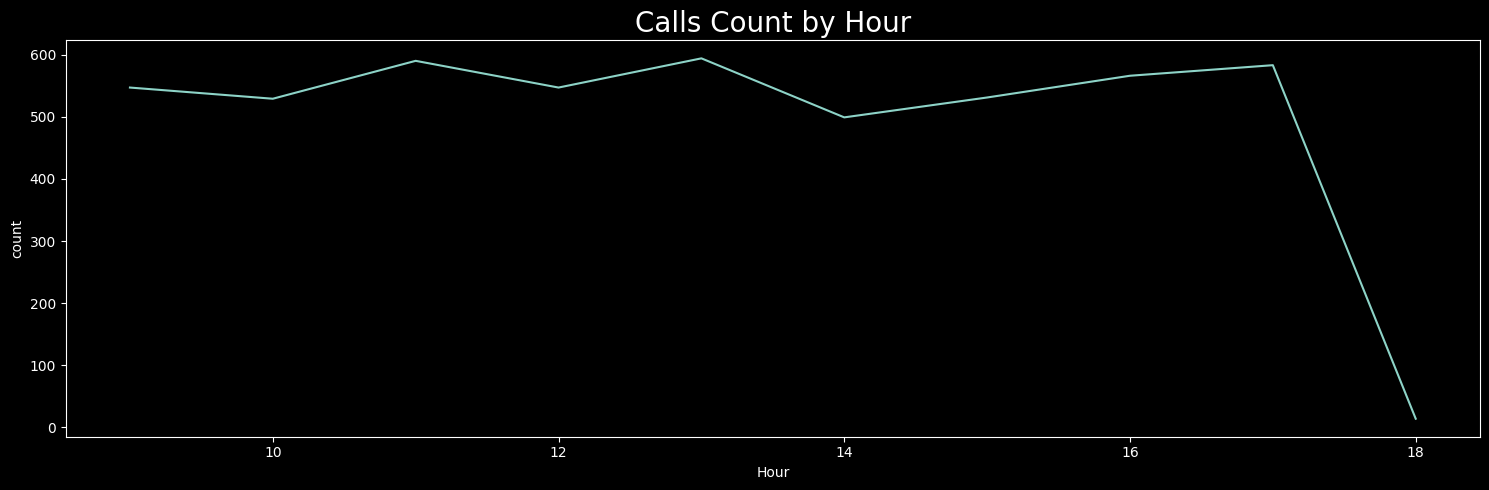

In [18]:
plt.figure(figsize=(15,5))

sns.lineplot(
    data=callCenter['Hour'].value_counts()
)

plt.title("Calls Count by Hour", fontsize=20)
plt.tight_layout()
plt.show()

# **`Multivariable Analysis`**

In [16]:
callCenter.columns

Index(['Call Id', 'Date', 'Agent', 'Department', 'Answered (Y/N)', 'Resolved',
       'Speed of Answer', 'AvgTalkDuration (seconds)', 'Satisfaction rating',
       'Hour'],
      dtype='object')